In [2]:
import cv2
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 


In [3]:
image = '../output_video/cropped_image.jpg'
image = cv2.imread(image)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [4]:
print(image)

[[[ 88 130  66]
  [ 88 130  66]
  [ 88 130  66]
  ...
  [103 141  84]
  [102 141  84]
  [102 141  84]]

 [[ 87 129  65]
  [ 87 129  65]
  [ 87 129  65]
  ...
  [104 139  83]
  [102 140  83]
  [101 140  83]]

 [[ 88 130  66]
  [ 88 130  66]
  [ 87 129  65]
  ...
  [108 141  88]
  [104 139  85]
  [102 139  85]]

 ...

 [[ 74 114  61]
  [ 67 109  59]
  [ 69 111  65]
  ...
  [ 71 112  54]
  [ 77 117  57]
  [ 77 117  57]]

 [[ 80 119  64]
  [ 74 114  61]
  [ 72 112  62]
  ...
  [ 73 112  55]
  [ 75 114  57]
  [ 75 114  57]]

 [[ 77 116  59]
  [ 83 122  67]
  [ 73 113  61]
  ...
  [ 73 112  55]
  [ 74 113  56]
  [ 74 113  56]]]


In [5]:
image.shape

(70, 42, 3)

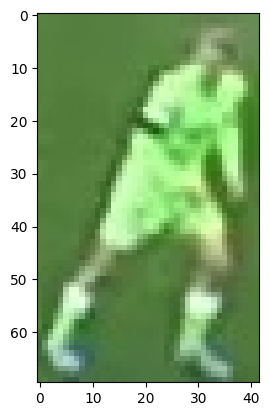

In [6]:
plt.imshow(image)

In [7]:
upper_image = image[0:35,:]

In [8]:
upper_image.shape

(35, 42, 3)

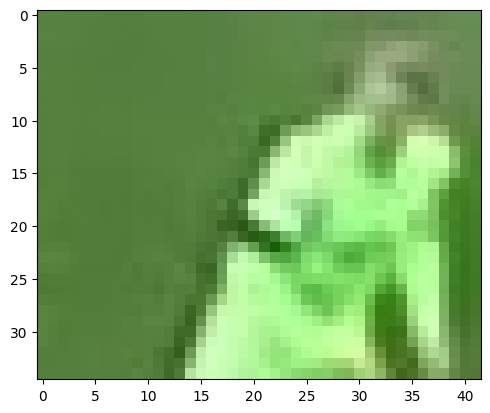

In [9]:
plt.imshow(upper_image)

In [10]:
#cluster the image into two colors 

(h,w,c) = upper_image.shape
image2d = upper_image.reshape(h*w,c)
print(image2d)
print(image2d.shape)

[[ 88 130  66]
 [ 88 130  66]
 [ 88 130  66]
 ...
 [ 99 134  68]
 [ 85 120  56]
 [ 84 119  55]]
(1470, 3)


In [11]:
from sklearn.cluster import KMeans


In [12]:
kmeans_model = KMeans(n_clusters=2) # we shall retain only 7 colors
kmeans_model.fit(image2d)

KMeans(n_clusters=2)

In [13]:
cluster_labels = kmeans_model.labels_
print(cluster_labels)

[0 0 0 ... 0 0 0]


In [14]:
from collections import Counter
labels_count = Counter(cluster_labels)
print(labels_count)

Counter({np.int32(0): 1071, np.int32(1): 399})


In [15]:
print(kmeans_model.cluster_centers_)

[[ 88.43843284 132.59981343  64.25      ]
 [170.19849246 234.33919598 144.34170854]]


In [16]:
rgb_cols = kmeans_model.cluster_centers_.round(0).astype(int)
print(rgb_cols)


[[ 88 133  64]
 [170 234 144]]


In [33]:
img_quant = cluster_labels.reshape(upper_image.shape[0],upper_image.shape[1])

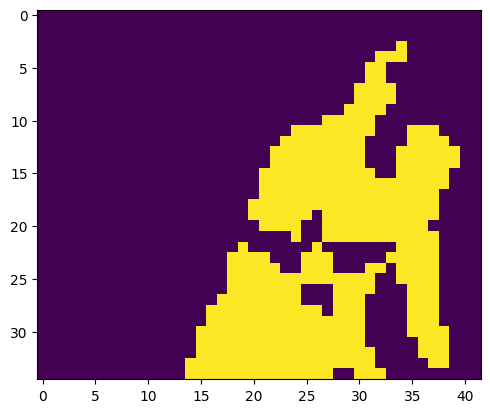

In [34]:
plt.imshow(img_quant)

In [36]:
corner_clusters = [img_quant[0,0],img_quant[0,-1],img_quant[-1,0],img_quant[-1,-1]]
corner_clusters
non_player_cluster = max(set(corner_clusters),key=corner_clusters.count)
non_player_cluster

np.int32(0)

In [37]:
player_cluster = 1- non_player_cluster


In [20]:
cluster_labels_reshaped = cluster_labels.reshape(img_quant.shape[:2])

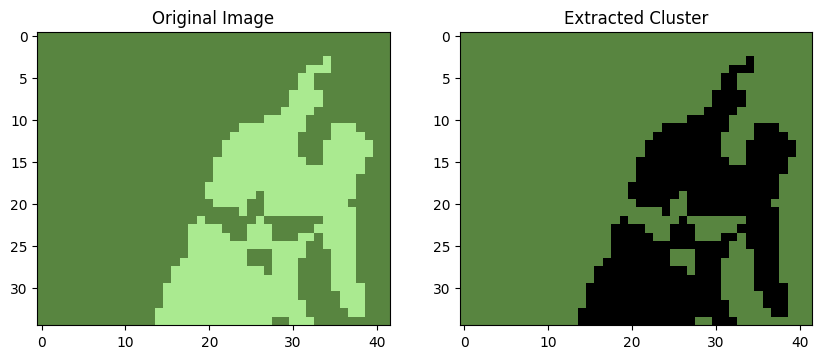

In [21]:
desired_cluster = 0
mask = cluster_labels_reshaped == desired_cluster

extracted_image = np.zeros_like(img_quant)
extracted_image[mask] = img_quant[mask]

plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_quant)
plt.title('Original Image')

# Extracted Cluster Image
plt.subplot(1, 2, 2)
plt.imshow(extracted_image)
plt.title('Extracted Cluster')

plt.show()


In [22]:
extracted_image

array([[[ 88, 133,  64],
        [ 88, 133,  64],
        [ 88, 133,  64],
        ...,
        [ 88, 133,  64],
        [ 88, 133,  64],
        [ 88, 133,  64]],

       [[ 88, 133,  64],
        [ 88, 133,  64],
        [ 88, 133,  64],
        ...,
        [ 88, 133,  64],
        [ 88, 133,  64],
        [ 88, 133,  64]],

       [[ 88, 133,  64],
        [ 88, 133,  64],
        [ 88, 133,  64],
        ...,
        [ 88, 133,  64],
        [ 88, 133,  64],
        [ 88, 133,  64]],

       ...,

       [[ 88, 133,  64],
        [ 88, 133,  64],
        [ 88, 133,  64],
        ...,
        [ 88, 133,  64],
        [ 88, 133,  64],
        [ 88, 133,  64]],

       [[ 88, 133,  64],
        [ 88, 133,  64],
        [ 88, 133,  64],
        ...,
        [ 88, 133,  64],
        [ 88, 133,  64],
        [ 88, 133,  64]],

       [[ 88, 133,  64],
        [ 88, 133,  64],
        [ 88, 133,  64],
        ...,
        [ 88, 133,  64],
        [ 88, 133,  64],
        [ 88, 133,  64]]

In [23]:
print(kmeans_model.cluster_centers_[0])

[ 88.43843284 132.59981343  64.25      ]
